In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample,shuffle
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,UI_449,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,UI_9014,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,UI_25532,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,UI_8772,Never-married,Entertainment,Infomercial,Female,40,Primetime,United-States,0.027465,High,Yes
1,UI_13139,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,No
2,UI_15381,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,High,No
3,UI_15503,Never-married,Auto,Comedy,Male,30,Primetime,United-States,0.027465,High,Yes
4,UI_16556,Never-married,Political,Comedy,Male,70,Morning,United-States,0.027465,Low,No


### Statistical analysis of data

In [4]:
train_df.isnull().sum()

UserID                               0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

In [5]:
test_df.isnull().sum()

UserID                               0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
dtype: int64

In [6]:
train_df.info()
print('***********')
print('***********')

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19536 entries, 0 to 19535
Data columns (total 12 columns):
UserID                               19536 non-null object
realtionship_status                  19536 non-null object
industry                             19536 non-null object
genre                                19536 non-null object
targeted_sex                         19536 non-null object
average_runtime(minutes_per_week)    19536 non-null int64
airtime                              19536 non-null object
airlocation                          19536 non-null object
ratings                              19536 non-null float64
expensive                            19536 non-null object
money_back_guarantee                 19536 non-null object
netgain                              19536 non-null int64
dtypes: float64(1), int64(2), object(9)
memory usage: 1.8+ MB
***********
***********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 11 c

In [7]:
train_df.describe

<bound method NDFrame.describe of          UserID realtionship_status   industry        genre targeted_sex  \
0       UI_9185  Married-civ-spouse     Pharma       Comedy         Male   
1        UI_449       Never-married  Political       Comedy         Male   
2       UI_9014       Never-married       Auto       Comedy         Male   
3      UI_14987  Married-civ-spouse     Pharma  Infomercial         Male   
4      UI_25532  Married-civ-spouse      Other       Comedy       Female   
...         ...                 ...        ...          ...          ...   
19531  UI_13124       Never-married       Auto  Infomercial         Male   
19532  UI_19649       Never-married  Political        Drama       Female   
19533   UI_9846  Married-civ-spouse      Other       Comedy       Female   
19534  UI_10800       Never-married  Political       Comedy         Male   
19535   UI_2733       Never-married  Political  Infomercial         Male   

       average_runtime(minutes_per_week)    airtime  

In [8]:
test_df.describe

<bound method NDFrame.describe of         UserID realtionship_status       industry        genre targeted_sex  \
0      UI_8772       Never-married  Entertainment  Infomercial       Female   
1     UI_13139            Divorced           Auto       Comedy       Female   
2     UI_15381  Married-civ-spouse         Pharma  Infomercial         Male   
3     UI_15503       Never-married           Auto       Comedy         Male   
4     UI_16556       Never-married      Political       Comedy         Male   
...        ...                 ...            ...          ...          ...   
6507   UI_2716       Never-married      Political        Drama         Male   
6508  UI_17670            Divorced  Entertainment       Comedy       Female   
6509  UI_16871  Married-civ-spouse         Pharma       Comedy         Male   
6510   UI_2667            Divorced           Auto       Comedy       Female   
6511  UI_18160            Divorced  Entertainment       Comedy       Female   

      average_run

In [9]:
for i in train_df.columns:
    print("Unique values in", i, train_df[i].nunique())

Unique values in UserID 19536
Unique values in realtionship_status 7
Unique values in industry 6
Unique values in genre 5
Unique values in targeted_sex 2
Unique values in average_runtime(minutes_per_week) 89
Unique values in airtime 3
Unique values in airlocation 42
Unique values in ratings 120
Unique values in expensive 3
Unique values in money_back_guarantee 2
Unique values in netgain 2


In [10]:
for i in test_df.columns:
    print("Unique values in", i, test_df[i].nunique())

Unique values in UserID 6512
Unique values in realtionship_status 7
Unique values in industry 6
Unique values in genre 5
Unique values in targeted_sex 2
Unique values in average_runtime(minutes_per_week) 82
Unique values in airtime 3
Unique values in airlocation 41
Unique values in ratings 93
Unique values in expensive 3
Unique values in money_back_guarantee 2


### Plotting Graphs for various features


In [11]:
train_df.netgain.value_counts()

0    14886
1     4650
Name: netgain, dtype: int64

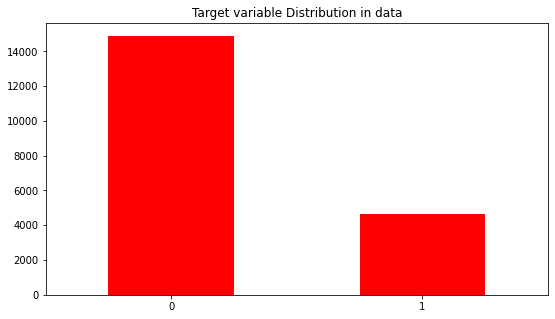

In [12]:
plt.figure(figsize=(9,5))
train_df.netgain.value_counts().plot.bar(rot=0, color='red')
plt.title("Target variable Distribution in data")
plt.show()

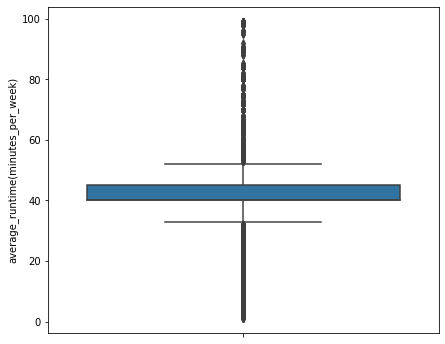

(19536, 12)

In [13]:
plt.figure(figsize=(7,6))
sns.boxplot(y='average_runtime(minutes_per_week)', data=train_df)
plt.show()
train_df.shape

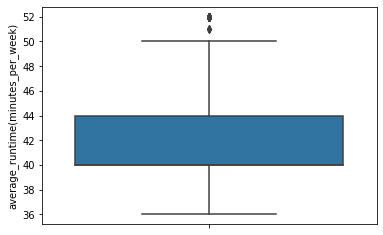

(13288, 12)

In [14]:
train_df = train_df[(train_df['average_runtime(minutes_per_week)']<53) & (train_df['average_runtime(minutes_per_week)']>35)]
sns.boxplot(y='average_runtime(minutes_per_week)', data=train_df)
plt.show()
train_df.shape

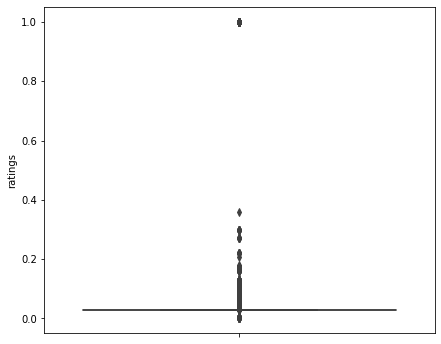

In [15]:
plt.figure(figsize=(7,6))
sns.boxplot(y='ratings', data=train_df)
plt.show()

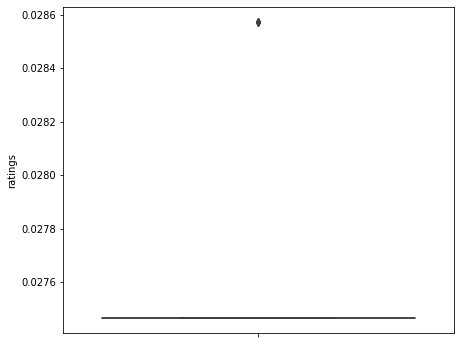

In [16]:
#train_df = train_df[train_df['ratings']<=0.03]

train_df = train_df[(train_df['ratings']<=0.03) & (train_df['ratings']>=0.025)]
plt.figure(figsize=(7,6))
sns.boxplot(y='ratings', data=train_df)
plt.show()

In [17]:
train_df.shape

(12115, 12)

In [18]:
train_df = train_df.drop('UserID',1)

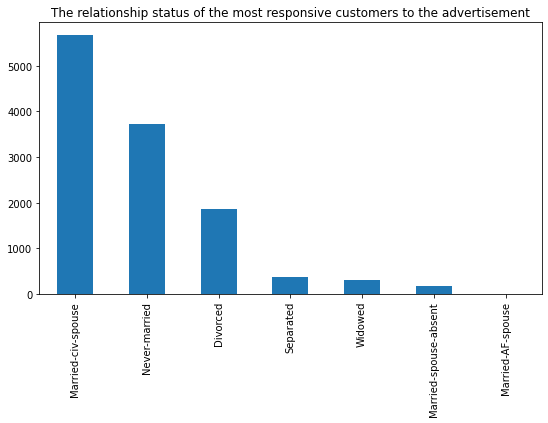

In [19]:
plt.figure(figsize=(9,5))
train_df.realtionship_status.value_counts().plot.bar()
plt.title('The relationship status of the most responsive customers to the advertisement')
plt.show()


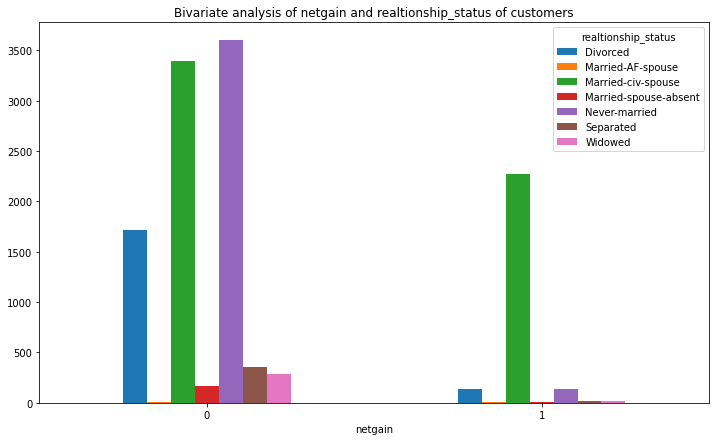

In [20]:

pd.crosstab(train_df['netgain'], train_df['realtionship_status']).plot(kind='bar',figsize=(12,7),rot=0)
plt.title('Bivariate analysis of netgain and realtionship_status of customers')
plt.show()

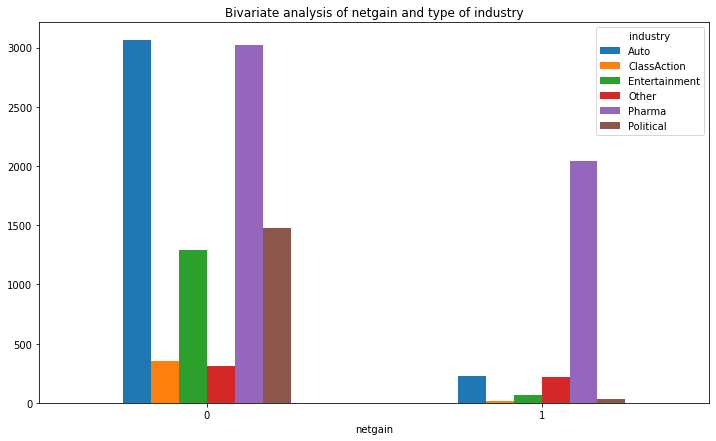

In [21]:
pd.crosstab(train_df['netgain'], train_df['industry']).plot(kind='bar',figsize=(12,7),rot=0)
plt.title('Bivariate analysis of netgain and type of industry')
plt.show()

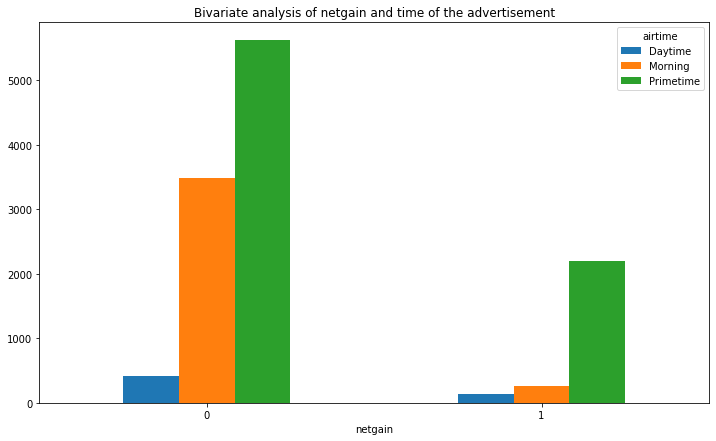

In [22]:
pd.crosstab(train_df['netgain'], train_df['airtime']).plot(kind='bar',figsize=(12,7),rot=0)
plt.title('Bivariate analysis of netgain and time of the advertisement')
plt.show()

In [23]:
pd.crosstab(train_df['netgain'], train_df['airlocation'])

airlocation,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
netgain,,,,,,,,,,,,,,,,,,,,,
0,10,38,14,24,32,26,10,32,26,11,...,15,36,2,29,14,5,7,8440,28,9
1,1,5,7,1,14,2,3,6,7,5,...,1,5,2,2,5,0,1,2358,1,4


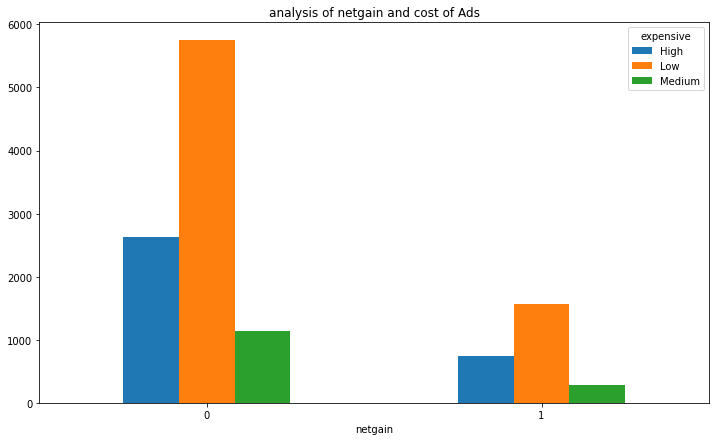

In [24]:
pd.crosstab(train_df['netgain'], train_df['expensive']).plot(kind='bar',figsize=(12,7),rot=0)
plt.title('analysis of netgain and cost of Ads')
plt.show()

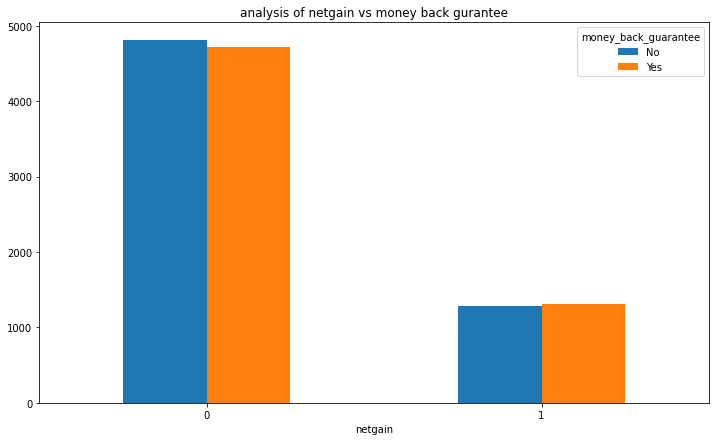

In [25]:
pd.crosstab(train_df['netgain'], train_df['money_back_guarantee']).plot(kind='bar',figsize=(12,7),rot=0)
plt.title('analysis of netgain vs money back gurantee')
plt.show()

In [26]:
train_df['targeted_sex'] = train_df['targeted_sex'].replace(['Male','Female'],[0,1])
test_df['targeted_sex'] = test_df['targeted_sex'].replace(['Male','Female'],[0,1])

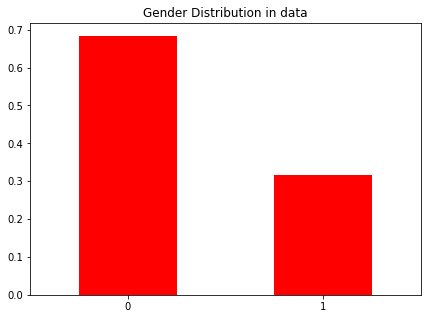

In [27]:
train_df.targeted_sex.value_counts(normalize=True).plot.bar(figsize=(7,5),color='red',rot=0)
plt.title("Gender Distribution in data")
plt.show()

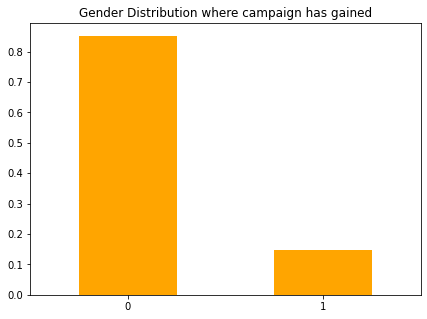

In [28]:
df_gain = train_df[train_df['netgain']==1]
df_gain.targeted_sex.value_counts(normalize=True).plot.bar(figsize=(7,5),color='orange',rot=0)
plt.title("Gender Distribution where campaign has gained")
plt.show()

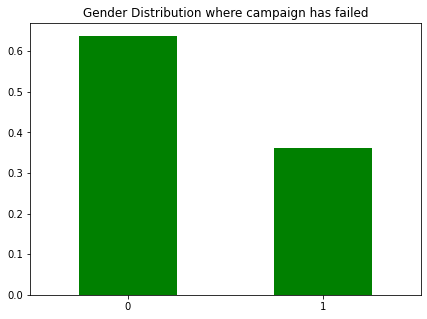

In [29]:
df_loss = train_df[train_df['netgain']==0]
df_loss.targeted_sex.value_counts(normalize=True).plot.bar(figsize=(7,5),color='green',rot=0)
plt.title("Gender Distribution where campaign has failed")
plt.show()

average_runtime according to Netgain


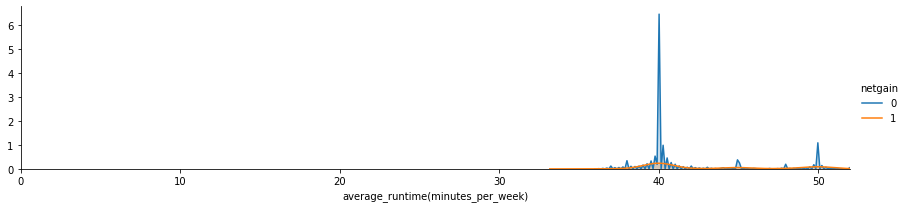

In [30]:
print("average_runtime according to Netgain")

facetgrid = sns.FacetGrid(train_df,hue="netgain",aspect = 4)
facetgrid.map(sns.kdeplot,"average_runtime(minutes_per_week)",shade = True)
facetgrid.set(xlim = (0,train_df["average_runtime(minutes_per_week)"].max()))
facetgrid.add_legend()
plt.show()

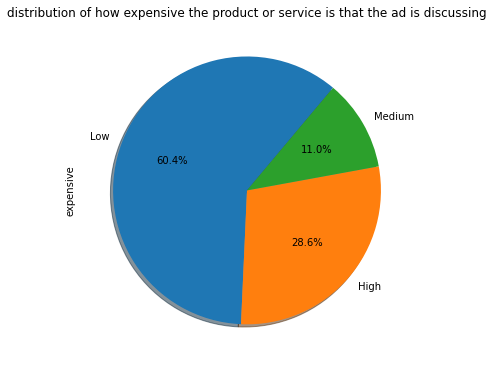

In [31]:
plt.rcParams['figure.figsize']=(6,8)

df_gain['expensive'].value_counts().plot.pie(y="expensive",startangle=50,shadow=True,autopct="%0.1f%%")
plt.title('distribution of how expensive the product or service is that the ad is discussing')

plt.axis('on');

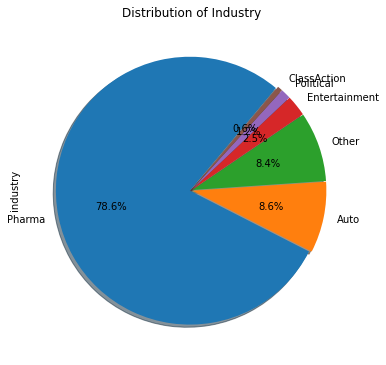

In [32]:
plt.rcParams['figure.figsize']=(6,8)
#color = ['yellowgreen','gold',"lightskyblue"]
df_gain['industry'].value_counts().plot.pie(y="industry",explode=(0.01,0.01,0.01,0.01,0.01,0.01),startangle=50,shadow=True,autopct="%0.1f%%")
plt.title('Distribution of Industry')
plt.axis('on');

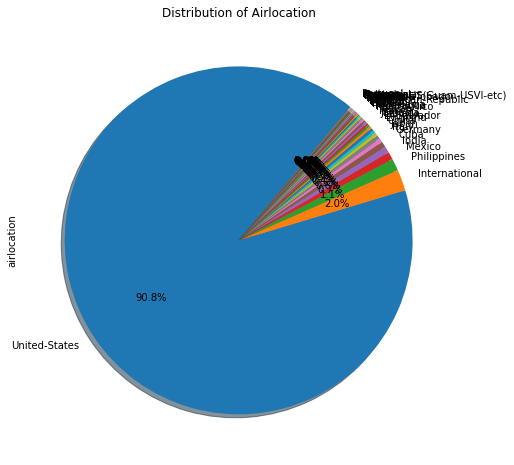

In [33]:
plt.rcParams['figure.figsize']=(12,8)
#color = ['yellowgreen','gold',"lightskyblue"]
df_gain['airlocation'].value_counts().plot.pie(y="airlocation",startangle=50,shadow=True,autopct="%0.1f%%")
plt.title('Distribution of Airlocation')
plt.axis('on');

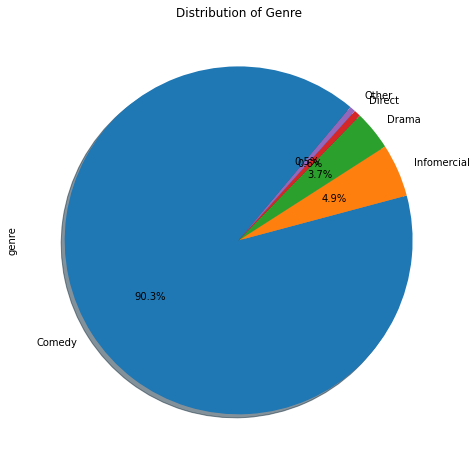

In [34]:
plt.rcParams['figure.figsize']=(12,8)
#color = ['yellowgreen','gold',"lightskyblue"]
df_gain['genre'].value_counts().plot.pie(y="genre",startangle=50,shadow=True,autopct="%0.1f%%")
plt.title('Distribution of Genre')
plt.axis('on');

### Plot a correlation matrix, remove the two least correlated features

Correlation matrix-


<AxesSubplot:>

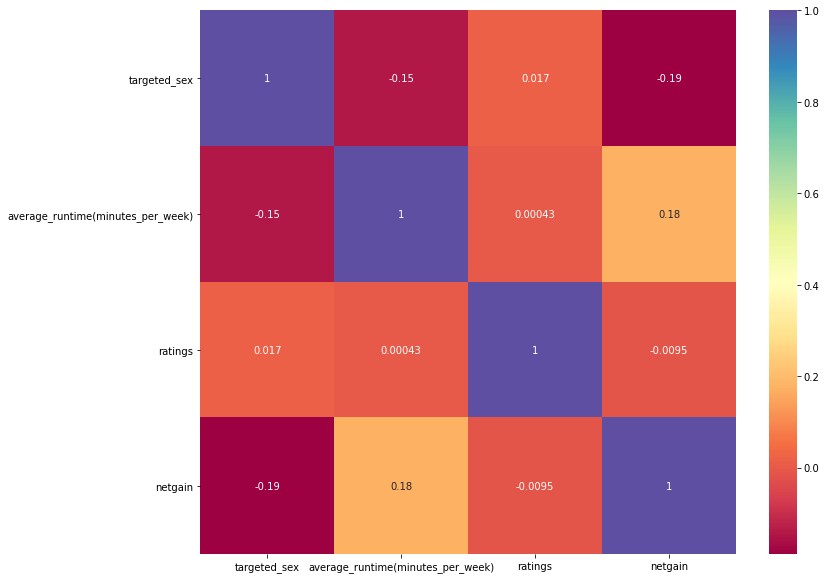

In [35]:
plt.figure(figsize=(12,10))
print("Correlation matrix-")
plt.rcParams['figure.figsize']=(8,6)
sns.heatmap(train_df.corr(),cmap='Spectral',annot = True)

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12115 entries, 0 to 19535
Data columns (total 11 columns):
realtionship_status                  12115 non-null object
industry                             12115 non-null object
genre                                12115 non-null object
targeted_sex                         12115 non-null int64
average_runtime(minutes_per_week)    12115 non-null int64
airtime                              12115 non-null object
airlocation                          12115 non-null object
ratings                              12115 non-null float64
expensive                            12115 non-null object
money_back_guarantee                 12115 non-null object
netgain                              12115 non-null int64
dtypes: float64(1), int64(3), object(7)
memory usage: 1.1+ MB


In [37]:
test_df = test_df.drop('UserID',1)

In [38]:
print(train_df.shape,test_df.shape)

(12115, 11) (6512, 10)


In [39]:
train_df.columns

Index(['realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [40]:
cols = ['realtionship_status', 'industry','genre','airtime', 'airlocation','expensive', 'money_back_guarantee']
for col in cols:
    train_df[col] =train_df[col].astype('category').cat.codes

In [41]:
colss = ['realtionship_status', 'industry','genre','airtime', 'airlocation','expensive', 'money_back_guarantee']
for col in colss:
    test_df[col] =test_df[col].astype('category').cat.codes

In [42]:
print(train_df.info(), test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12115 entries, 0 to 19535
Data columns (total 11 columns):
realtionship_status                  12115 non-null int8
industry                             12115 non-null int8
genre                                12115 non-null int8
targeted_sex                         12115 non-null int64
average_runtime(minutes_per_week)    12115 non-null int64
airtime                              12115 non-null int8
airlocation                          12115 non-null int8
ratings                              12115 non-null float64
expensive                            12115 non-null int8
money_back_guarantee                 12115 non-null int8
netgain                              12115 non-null int64
dtypes: float64(1), int64(3), int8(7)
memory usage: 556.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 10 columns):
realtionship_status                  6512 non-null int8
industry                          

In [43]:
print(train_df.shape, test_df.shape)

(12115, 11) (6512, 10)


In [44]:
X = train_df.drop('netgain',1)
y = train_df['netgain']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0)


In [46]:
# initialize the logistic regression model
logisticRegression = LogisticRegression()

# fit the data
logisticRegression.fit(X_train, y_train)

# find out the predictions
predictions = logisticRegression.predict(X_test)

# print accuracy and auc_roc score
print(f"Accuracy score is {100*accuracy_score(y_test,predictions).round(2)}")
print(classification_report(predictions, y_test))
# logisticRegression.score(y_test,predictions)

Accuracy score is 78.0
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      2271
           1       0.15      0.55      0.24       152

    accuracy                           0.78      2423
   macro avg       0.56      0.67      0.55      2423
weighted avg       0.91      0.78      0.83      2423



In [47]:
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rfc.fit(X_train, y_train)

ypred_rfc = rfc.predict(X_test)
print(classification_report(ypred_rfc, y_test))

              precision    recall  f1-score   support

           0       0.90      0.81      0.86      2072
           1       0.31      0.49      0.38       351

    accuracy                           0.77      2423
   macro avg       0.61      0.65      0.62      2423
weighted avg       0.82      0.77      0.79      2423



In [48]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)

ypred_dtc = dtc.predict(X_test)
print(classification_report(ypred_dtc, y_test))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      2078
           1       0.29      0.48      0.36       345

    accuracy                           0.76      2423
   macro avg       0.60      0.64      0.61      2423
weighted avg       0.82      0.76      0.78      2423



In [49]:


clf_xgb=XGBClassifier()
clf_xgb.fit(X_train,y_train)

ypred_xgb = clf_xgb.predict(X_test)
print(classification_report(ypred_xgb, y_test))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      2146
           1       0.27      0.54      0.36       277

    accuracy                           0.78      2423
   macro avg       0.60      0.67      0.61      2423
weighted avg       0.86      0.78      0.81      2423



In [50]:
X_train.head()

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
18565,4,0,0,0,40,1,38,0.027465,1,0
2030,4,2,3,1,40,1,29,0.027465,0,1
16164,2,4,0,0,40,2,38,0.027465,2,0
4635,2,4,0,0,45,2,38,0.027465,1,0
7250,5,0,4,1,36,2,38,0.027465,1,0


In [51]:
#combining train features and target
df = pd.concat([X_train,y_train],axis=1)

# separating the two classes
df_majority = df[df['netgain']==0]
df_minority = df[df['netgain']==1]

# upsample the minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=y_train.value_counts()[0],random_state = 123)

# Combine the two class data and check for the valu counts of each class
balanced_df = pd.concat([df_minority_upsampled,df_majority])
balanced_df = shuffle(balanced_df)
balanced_df.netgain.value_counts()

1    7651
0    7651
Name: netgain, dtype: int64

In [52]:
X_trainn = balanced_df.drop('netgain',1)
y_trainn = balanced_df['netgain']

In [53]:
logisticRegression.fit(X_trainn, y_trainn)
logistic_pred = dtc.predict(X_test)
print(classification_report(logistic_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      2078
           1       0.29      0.48      0.36       345

    accuracy                           0.76      2423
   macro avg       0.60      0.64      0.61      2423
weighted avg       0.82      0.76      0.78      2423



In [54]:
dtc.fit(X_trainn, y_trainn)

ypred_dtc1 = dtc.predict(X_test)
print(classification_report(ypred_dtc1, y_test))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77      1389
           1       0.75      0.41      0.53      1034

    accuracy                           0.69      2423
   macro avg       0.71      0.65      0.65      2423
weighted avg       0.71      0.69      0.67      2423



In [55]:
rfc.fit(X_trainn, y_trainn)

ypred_rfc1 = rfc.predict(X_test)
print(classification_report(ypred_rfc1, y_test))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77      1379
           1       0.77      0.41      0.53      1044

    accuracy                           0.69      2423
   macro avg       0.72      0.66      0.65      2423
weighted avg       0.71      0.69      0.67      2423



In [58]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200]
}
xgb_model = XGBClassifier()

gsearch = RandomizedSearchCV(estimator = xgb_model,
                           param_distributions  = param_tuning,                        
                           
                           cv = 5,
                           n_jobs = -1)

gsearch.fit(X_trainn,y_trainn)

ypred_xgb1 = gsearch.predict(X_test)
print(classification_report(ypred_xgb1, y_test))

              precision    recall  f1-score   support

           0       0.68      0.93      0.79      1363
           1       0.83      0.44      0.57      1060

    accuracy                           0.72      2423
   macro avg       0.76      0.68      0.68      2423
weighted avg       0.75      0.72      0.69      2423



In [59]:
gb_clf = GradientBoostingClassifier(random_state=0)

gb_clf.fit(X_trainn, y_trainn)
gb_pred = gb_clf.predict(X_test)
print(classification_report(gb_pred, y_test))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79      1382
           1       0.82      0.44      0.57      1041

    accuracy                           0.72      2423
   macro avg       0.76      0.69      0.68      2423
weighted avg       0.75      0.72      0.70      2423



In [60]:
clf_ada = AdaBoostClassifier(n_estimators=50)
clf_ada.fit(X_trainn, y_trainn)

ypred_ada = clf_ada.predict(X_test)

print(classification_report(y_test, ypred_ada))

              precision    recall  f1-score   support

           0       0.93      0.68      0.78      1866
           1       0.43      0.82      0.57       557

    accuracy                           0.71      2423
   macro avg       0.68      0.75      0.68      2423
weighted avg       0.81      0.71      0.73      2423



In [61]:
test_df

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,4,2,3,1,40,2,38,0.027465,0,1
1,0,0,0,1,40,2,38,0.027465,1,0
2,2,4,3,0,40,2,38,0.027465,0,0
3,4,0,0,0,30,2,38,0.027465,0,1
4,4,5,0,0,70,1,38,0.027465,1,0
...,...,...,...,...,...,...,...,...,...,...
6507,4,5,2,0,40,2,19,0.027465,1,1
6508,0,2,0,1,40,2,38,0.027465,1,1
6509,2,4,0,0,40,2,38,0.027465,0,1
6510,0,0,0,1,35,2,38,0.027465,1,1


In [62]:
final_1 = gsearch.predict(test_df)
output = pd.DataFrame(data = final_1, columns=['netgain'])
#output = output['Price'].astype(int)
output.to_csv('tunned.csv', index=False)
output

,netgain
0,0
1,0
2,1
3,0
4,0
...,...
6507,0
6508,0
6509,1
6510,0
